In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Upload the CSV file in Colab
from google.colab import files
uploaded = files.upload()

# Read CSV file
df = pd.read_csv('\content\student-scores.csv')  # change this to your actual filename
df.head()

In [5]:
# Read CSV file
df = pd.read_csv('\content\student-scores.csv')  # change this to your actual filename
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '\\content\\student-scores.csv'

In [6]:
# Read CSV file
df = pd.read_csv('/content/student-scores.csv')  # change this to your actual filename
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [7]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

,0
id,0
first_name,0
last_name,0
email,0
gender,0
part_time_job,0
absence_days,0
extracurricular_activities,0
weekly_self_study_hours,0
career_aspiration,0


In [8]:
# Drop columns .... vishwa
df = df.drop(['id', 'first_name', 'last_name', 'email', 'career_aspiration'], axis=1)

In [9]:
# Check correlation
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Visualize relation between weekly self study hours and math score
sns.scatterplot(data=df, x='weekly_self_study_hours', y='math_score')
plt.title("Study Hours vs Math Score")
plt.show()

ValueError: could not convert string to float: 'male'

In [10]:
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,male,False,3,False,27,73,81,93,97,63,80,87
1,female,False,2,False,47,90,86,96,100,90,88,90
2,female,False,9,True,13,81,97,95,96,65,77,94
3,female,False,5,False,3,71,74,88,80,89,63,86
4,male,False,5,False,10,84,77,65,65,80,74,76


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'male'

<Figure size 1000x600 with 0 Axes>

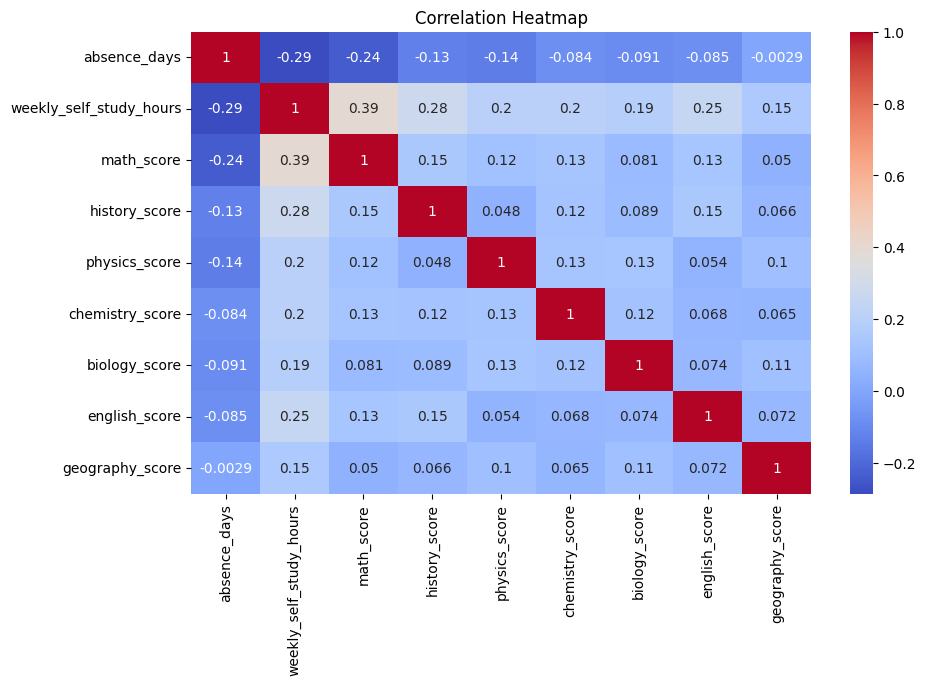

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Now create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# Features (X) and Target (y)
X = df[['weekly_self_study_hours']]  # feature(s)
y = df['math_score']                 # target

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1600, 1)
Testing set size: (400, 1)


In [15]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model with training data
model.fit(X_train, y_train)

# Get the model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: 75.67235954861998
Coefficient: [0.4306625]


In [16]:
# Make predictions using the test set
y_pred = model.predict(X_test)

# Compare predicted values with actual values
print("Predicted values:", y_pred)
print("Actual values:", y_test.values)

Predicted values: [83.85494696 76.10302204 82.56295948 77.82567203 76.53368454 77.82567203
 82.13229698 89.45355941 76.53368454 77.39500953 84.71627195 77.82567203
 77.82567203 90.3148844  84.71627195 82.13229698 76.10302204 86.86958443
 88.16157192 85.14693445 85.14693445 83.42428447 84.71627195 90.3148844
 87.30024693 77.82567203 92.03753438 77.82567203 85.14693445 83.85494696
 81.70163449 81.70163449 88.59223441 76.10302204 82.56295948 81.27097199
 77.82567203 81.27097199 87.73090942 90.74554689 79.54832201 89.45355941
 87.73090942 86.86958443 86.43892194 81.70163449 87.30024693 82.13229698
 82.13229698 86.00825944 76.96434704 86.43892194 77.39500953 77.39500953
 87.30024693 87.73090942 86.86958443 76.53368454 79.11765951 88.59223441
 80.409647   76.96434704 76.10302204 87.73090942 79.11765951 80.409647
 77.82567203 80.84030949 76.53368454 76.10302204 86.00825944 76.96434704
 90.3148844  87.73090942 81.27097199 77.39500953 97.20548433 76.10302204
 76.53368454 86.43892194 85.14693445

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 139.04097573746876
R-squared: 0.16212713007562618


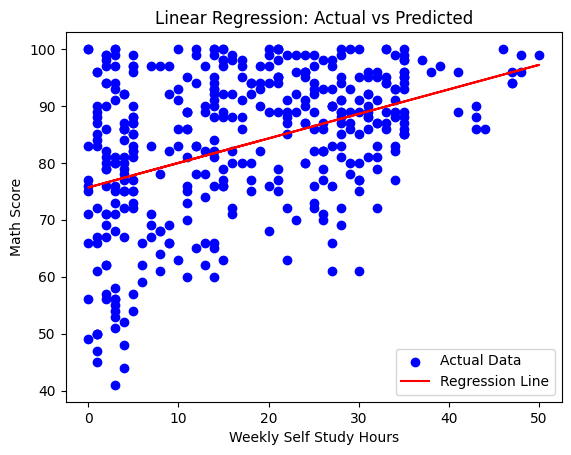

In [18]:
import matplotlib.pyplot as plt

# Plot the original data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Adding titles and labels
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Weekly Self Study Hours")
plt.ylabel("Math Score")
plt.legend()

# Show the plot
plt.show()

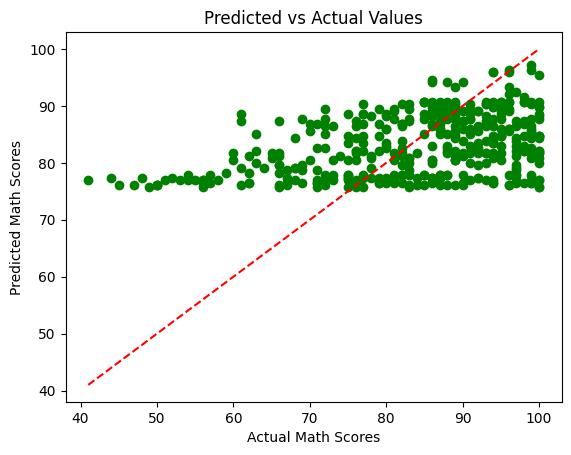

In [19]:
# Plotting predicted vs actual values
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.show()